### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

## Módulo 1 - Classificação de dados - Aula 11 - Desafio: hora da prática

1 - Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

Para a construção de um modelo de machine learning são necessários dados. Como tarefa inicial, faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y). A variável alvo é a coluna que quer classificar, contendo a informação se o paciente possui ou não a diabetes. As variáveis explicativas são todas as colunas com exceção da diabetes. A separação dos dados pode ser feita com a seleção de colunas com pandas.

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('C:\\Users\\joaoc\\OneDrive\\Documentos\\Aprendizado_ONE\\formacao-tech-foundation\\curso17_classificacao_validacao_de_modelos_metricas_de_avaliacao\\desafio_hora_da_pratica\\diabetes.csv')

In [3]:
dados

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [4]:
x = dados.drop('diabetes', axis=1)
y = dados['diabetes']

2 - Realize a divisão dos dados entre treino e teste.

Uma etapa muito importante em projetos de classificação é a validação dos modelos, para identificar se está havendo a generalização do modelo para dados novos. Realize a divisão dos dados entre treino, validação e teste. Utilize 5% dos dados para teste e com o restante, deixe 25% para validação. No momento da separação, use o parâmetro stratify a partir da variável alvo para manter a proporção dos dados.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x, x_teste, y, y_teste = train_test_split(x, y, stratify = y, test_size = 0.05, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

3 - Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

A etapa de modelagem de dados consiste em utilizar um algoritmo capaz de identificar padrões nos dados e classificar os valores. A partir do modelo é possível extrair uma taxa de acerto para entender o seu desempenho. Crie 2 modelos utilizando os algoritmos DecisionTreeClassifier e RandomForestClassifer e avalie a acurácia de treino e teste, escolhendo o valor 3 para o parâmetro max_depth do algoritmo DecisionTreeClassifier e valor 2 para o max_depth do algoritmo RandomForestClassifier, para os modelos não se especializarem demais no padrão dos dados de treino.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

In [9]:
arvore.fit(x_treino, y_treino)
print(f'Acurácia de treino: {arvore.score(x_treino, y_treino)}')
print(f'Acurácia de teste: {arvore.score(x_val, y_val)}')

Acurácia de treino: 0.7571428571428571
Acurácia de teste: 0.776595744680851


In [10]:
random_forest.fit(x_treino, y_treino)
print(f'Acurácia de treino: {random_forest.score(x_treino, y_treino)}')
print(f'Acurácia de teste: {random_forest.score(x_val, y_val)}')

Acurácia de treino: 0.725
Acurácia de teste: 0.723404255319149


4 - Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

A taxa de acerto geralmente não fornece informações suficientes para entender o comportamento do modelo. A matriz de confusão é uma ferramenta mais completa, capaz de fornecer os acertos e erros do modelo para cada classe. Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho da previsão. Para construir a matriz, use o método predict para gerar as previsões dos valores e comparar com os valores reais da base de dados.

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

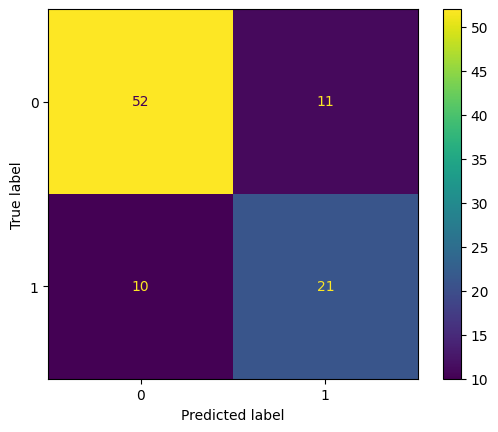

In [12]:
previsao_arvore = arvore.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, previsao_arvore);

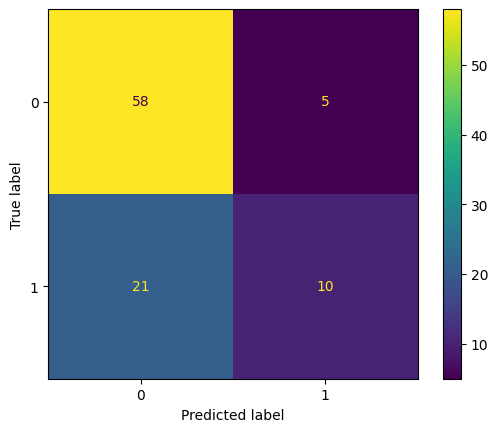

In [13]:
previsao_rf = random_forest.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, previsao_rf);

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.